In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf  # Using formula API

In [2]:
baseball = pd.read_csv('data/baseball.csv')

In [3]:
baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [6]:
moneyball = baseball.query("Year < 2002")

In [9]:
moneyball = moneyball.assign(RD=moneyball['RS'] - moneyball['RA'])

In [10]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


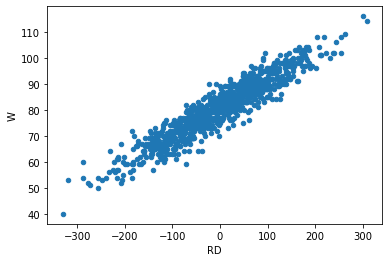

In [18]:
moneyball.plot.scatter(x='RD', y='W')

In [12]:
model = smf.ols('W ~ RD', data=moneyball).fit()

In [13]:
predictions = model.predict()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:07:57   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8814      0.131    616.675      0.000      80.624      81.139
RD             0.1058      0.001     81.554      0.000       0.103       0.108
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

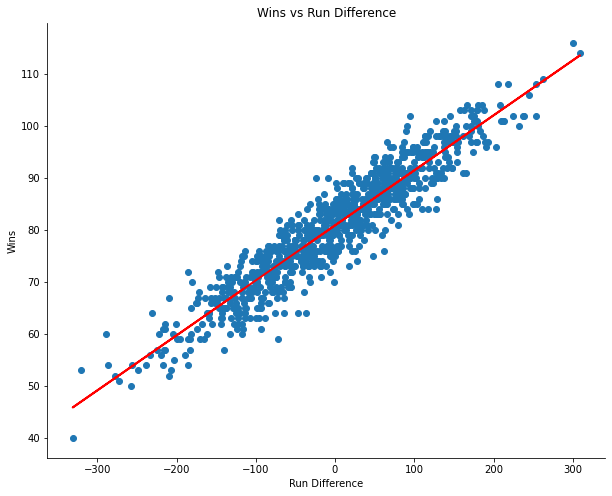

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(moneyball['RD'], moneyball['W'], 'o')
plt.plot(moneyball['RD'], predictions, 'r', linewidth=2)
plt.xlabel('Run Difference')
plt.ylabel('Wins')
plt.title('Wins vs Run Difference')
sns.despine()
plt.show()

**Proof:** What is minimum run difference needed to have more than 95 games won?

From our model above, the y-intercept is 80.8814 and the slope is 0.1058.

$y = mx + b$<br><br>
$W = 0.1058(RD) + 80.8814$<br><br>
$W \geq 95$<br><br>
$0.1058(RD) + 80.8814 \geq 95$<br><br>
$RD \geq \frac{95 - 80.8814}{0.1058} = 133.4$<br><br>
$RD \geq 133.4$

**Answer:** You need to have a run difference of at least 134

### How to Predict Runs

**Proof:**
- On-Base Percentage was most important
- Slugging Percentage was import
- Batting Average was overvalued

Can we use linear regression to verify which baseball stats are important for predicting runs?